In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# input = [x1, x2, ... xn]
#  inside the prceptron, there are weights [w1, w2, ... wn] and a bias 'b'

# if sum of element-wise product of xs and ws > b, output is 1, else it is 0

class Perceptron:
    
    #Constructor
    def __init__(self,n):
        self.stepsize = 0.01
        self.inputsize = n
        self.weights = np.random.random(n)
        self.bias = n * np.random.random()
        self.inputfeatures = np.matrix.transpose(0*self.weights)
        self.output = 0
        self.numiter = 1000
        
    #Get output
    def getOutput(self):
        return self.output
    
    #Get weights
    def getWeights(self):
        return self.weights
    
    #Get bias
    def getBias(self):
        return self.bias
    
    #Set weights
    def setWeights(self,w):
        self.weights = w
        
    #Set bias
    def setBias(self,b):
        self.bias = b
        
    #Display
    def display(self):
        print('Weights:',self.weights)
        print('Bias:',self.bias)
        
    def check(self,inp):
        if inp.shape[0] != self.inputsize:
            self.output = -1
        else:
            self.inputfeatures = inp
            z = self.bias + np.matmul(self.weights,inp)
            
            #Sigmoid function response
            #self.output = 1 / (1 + np.exp(-z))
            
            # Step function response
            if z > 0:
                self.output = 1
            else:
                self.output = 0
        return self
    
    #Train
    def train(self,inp,out):
        if inp.shape[0] != self.inputsize:
            print('Wrong Input Size!!!')
        else:
            self = self.check(inp)
            if self.output != out:
                count = 0
                while count < self.numiter and out != self.output:
                    self.weights = self.weights + self.stepsize*(out - self.output) * np.matrix.transpose(inp)
                    self.bias = self.bias + self.stepsize*(out - self.output)
                    self = self.check(inp)
                    count += 1
            return self
        
        
        

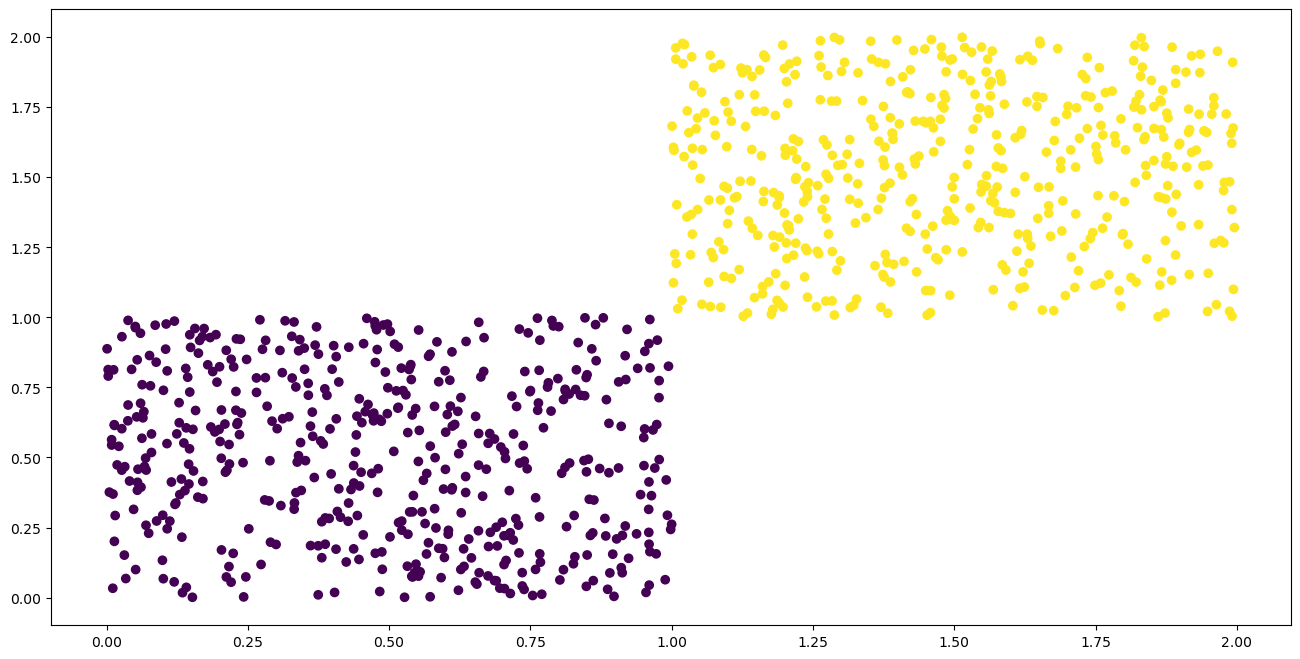

In [11]:
INPUTSIZE = 2
p = Perceptron(INPUTSIZE)
NUMTRAIN = 1000
trainlabels = (np.random.randint(2, size = (NUMTRAIN,1)))
traindata = np.random.rand(NUMTRAIN,INPUTSIZE) + trainlabels

#traindata[:,0] += trainlabels[:,0]
#traindata[:,1] += (1-trainlabels[:,0])

fig = plt.figure(figsize=[16,8])
plt.scatter(traindata[:,0],traindata[:,1],c=trainlabels[:,0])
plt.show()



In [12]:
trainlabels.shape


(1000, 1)

In [13]:
for i in range(NUMTRAIN):
    p = p.train(np.matrix.transpose(traindata[i,:]),trainlabels[i,0])
print('Training done.')

Training done.


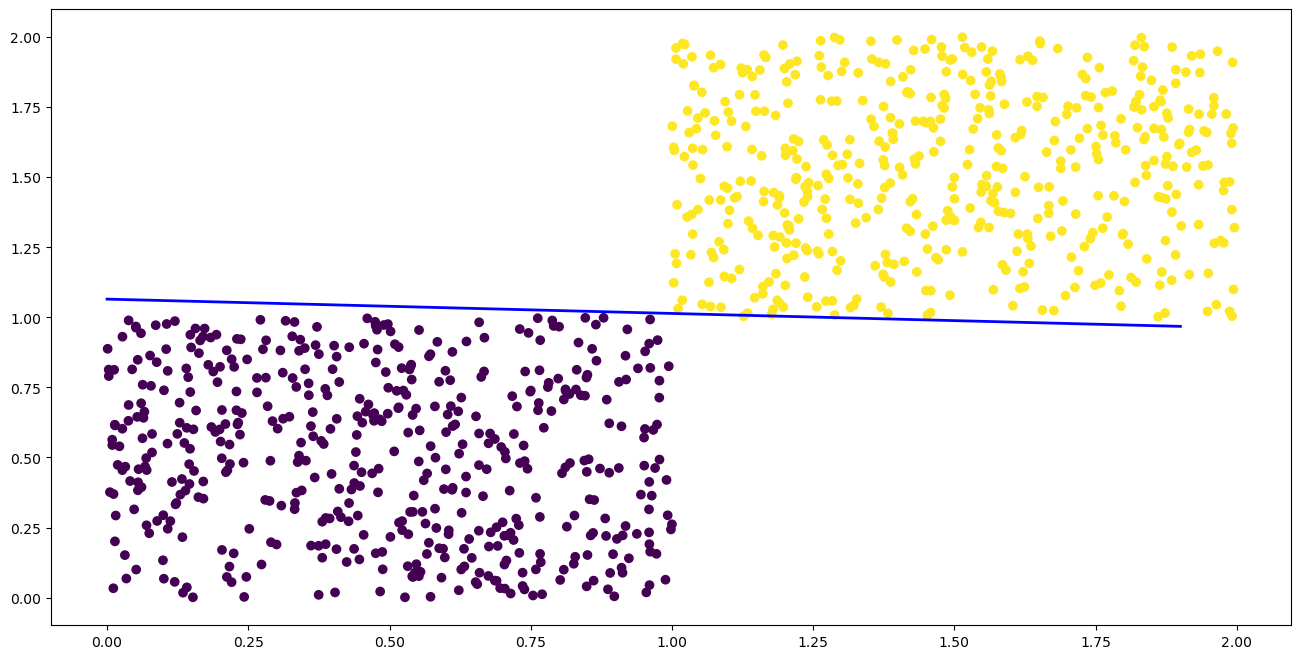

In [14]:
fig = plt.figure(figsize=[16,8])
plt.scatter(traindata[:,0],traindata[:,1],c=trainlabels[:,0])
w = p.getWeights()
A = w[0]
B = w[1]
C = p.getBias()
x = np.arange(0,2,0.1)
plt.plot(x,(-C/B - A*x/B),color = 'blue',linewidth=2)
plt.show()

In [10]:
r = np.random.randint(2)
testdata = np.random.random(INPUTSIZE) + r
print('Test data:',testdata)
p = p.check(testdata)
print('True label:',r)
print('predicted Label:',p.getOutput())
p.display()




Test data: [0.24196388 0.53370394]
True label: 0
predicted Label: 0
Weights: [0.21565603 0.01314713]
Bias: -0.2260070853204869
